<a href="https://colab.research.google.com/github/Denielt1/Eletromag/blob/main/Eletromag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definindo o ambiente

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation



def campoE(carga, loc, limx, limy):
  k = 8.98755*(10**9)
  ambi = np.zeros((limx, limy)) + np.complex(0,0)
  field = np.zeros((limx, limy)) + np.complex(0,0)
  for t in range(0, limx):
    for tt in range(0, limy):
      if [t, tt ] == loc:
        ambi[t, tt] = 1.2*k*carga
        field[t, tt] = 1.2*k*carga*np.complex(1,1)
      else:
        field[t, tt] = k*carga/(np.complex(-loc[0]+t, -loc[1]+tt))
        r = np.sqrt(((t-loc[0]))**2 + ((tt-loc[1]))**2)
        ambi[t, tt] = k*carga/(r**2)
  return ambi, field

def mag2db(vetor, limx, limy):
  for m in range(limx):
    for mm in range(limy):
      if vetor[m][mm] < (10**(-90)):
        vetor[m][mm] = -100
      else:
        vetor[m][mm] = 20*np.log10(vetor[m][mm])
  return vetor


q = (10**(-9))  #Coulombs
q2 = (10**(-9))
pos = [16, 8]
pos2 = [16, 16]
pos3 = [16, 4]
x = 24
y = 24


amb = campoE(q, pos, x, y)[0] + campoE(q2, pos2, x, y)[0]
ambb = campoE(q, pos, x, y)[1] + campoE(q2, pos2, x, y)[1]

amb2 = np.abs(ambb)
amb3 = np.real(ambb)
amb4 = np.imag(ambb)

amb = mag2db(amb, x, y)
amb2 = mag2db(amb2, x, y)
amb3 = mag2db(amb3, x, y)
amb4 = mag2db(amb4, x, y)


/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:2795: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


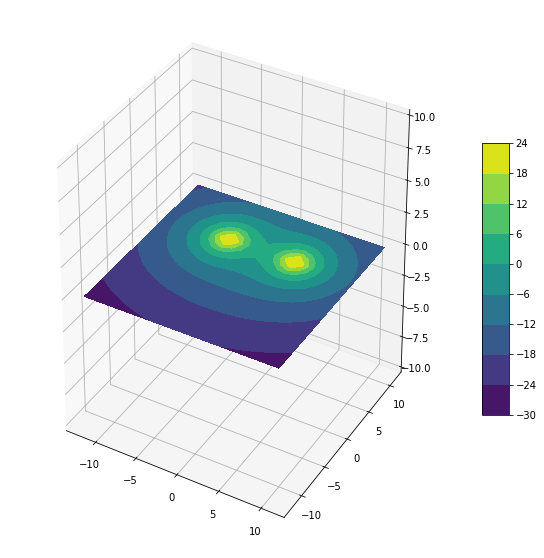

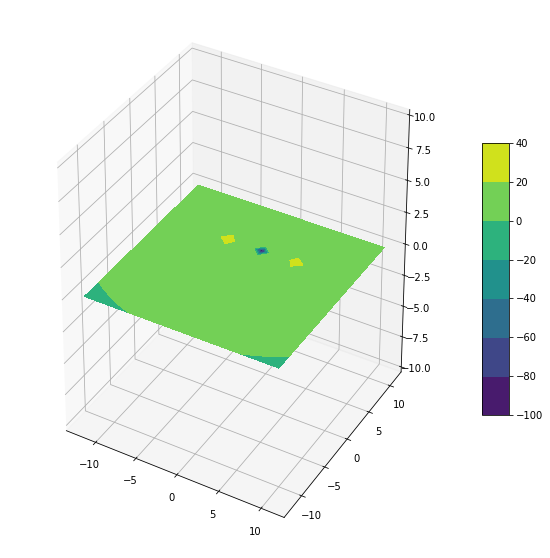

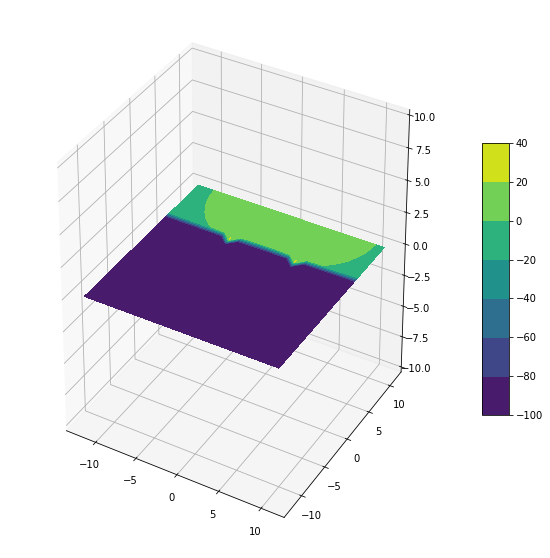

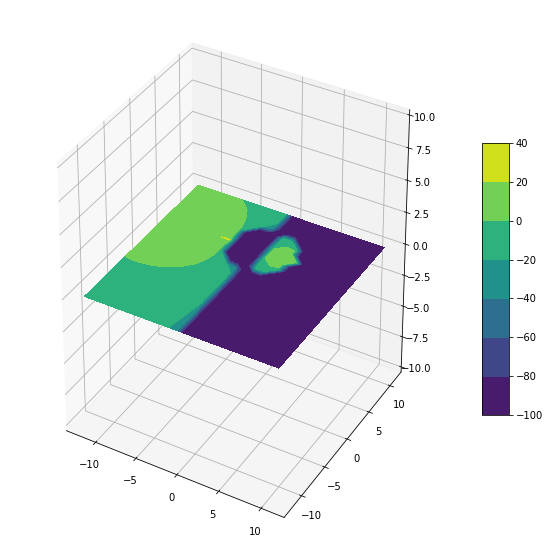

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=[10, 10])
ax = fig.gca(projection='3d')
ax2 = fig.gca(projection='3d')



# Make data.
X = np.arange(-12, 12)
Y = np.arange(-12, 12)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
#print(len(Z))
#print(len(amb))



# Plot the surface.
#surf = ax.plot_surface(X, Y, amb, cmap=cm.coolwarm, linewidth=0, antialiased=False)


# Customize the z axis.
ax.set_zlim(-10, 10)
#ax.set_xlim(-10, 10)
#ax.set_ylim(-10, 10)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.

surf2 = ax2.contourf(X, Y, amb, zdir='z', offset= 0)
fig.colorbar(surf2, shrink=0.5, aspect=10)
plt.show()


fig5 = plt.figure(figsize=[10, 10])
ax5 = fig5.gca(projection='3d')
ax5.set_zlim(-10, 10)
surf2 = ax5.contourf(X, Y, amb2, zdir='z', offset= 0)
fig5.colorbar(surf2, shrink=0.5, aspect=10)
plt.show()

fig6 = plt.figure(figsize=[10, 10])
ax6 = fig6.gca(projection='3d')
ax6.set_zlim(-10, 10)
surf6 = ax6.contourf(X, Y, amb3, zdir='z', offset= 0)
fig6.colorbar(surf6, shrink=0.5, aspect=10)
plt.show()

fig7 = plt.figure(figsize=[10, 10])
ax7 = fig7.gca(projection='3d')
ax7.set_zlim(-10, 10)
surf7 = ax7.contourf(X, Y, amb4, zdir='z', offset= 0)
fig7.colorbar(surf7, shrink=0.5, aspect=10)
plt.show()

